In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/train_fNxu4vz.csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
print(train.shape)
print(test.shape)

(164309, 14)
(109541, 13)


In [1]:
#combining train and test data

In [0]:
train['train/test']=1
test['train/test']=0

In [0]:
df1=pd.concat([train,test],axis=0)
df=df1.drop(columns=['Loan_ID'],axis=1)

In [7]:
df.shape

(273850, 14)

# checking null value

In [8]:
df.isnull().sum()*100/df.shape[0]

Loan_Amount_Requested       0.000000
Length_Employed             4.494066
Home_Owner                 15.358773
Annual_Income              15.336863
Income_Verified             0.000000
Purpose_Of_Loan             0.000000
Debt_To_Income              0.000000
Inquiries_Last_6Mo          0.000000
Months_Since_Deliquency    53.765930
Number_Open_Accounts        0.000000
Total_Accounts              0.000000
Gender                      0.000000
Interest_Rate              40.000365
train/test                  0.000000
dtype: float64

In [0]:
#we can see there are missing values in the dataset

In [10]:
for i in df.columns:
  print(i)
  print(df[i].dtypes)
  print("percentage missing values is : ",df[i].isnull().sum()*100/df.shape[0] , "%" )
  print("unique values in this feature :",df[i].nunique())
  print()

Loan_Amount_Requested
object
percentage missing values is :  0.0 %
unique values in this feature : 1320

Length_Employed
object
percentage missing values is :  4.494066094577323 %
unique values in this feature : 11

Home_Owner
object
percentage missing values is :  15.358773050940297 %
unique values in this feature : 5

Annual_Income
float64
percentage missing values is :  15.33686324630272 %
unique values in this feature : 18573

Income_Verified
object
percentage missing values is :  0.0 %
unique values in this feature : 3

Purpose_Of_Loan
object
percentage missing values is :  0.0 %
unique values in this feature : 14

Debt_To_Income
float64
percentage missing values is :  0.0 %
unique values in this feature : 3987

Inquiries_Last_6Mo
int64
percentage missing values is :  0.0 %
unique values in this feature : 9

Months_Since_Deliquency
float64
percentage missing values is :  53.76593025378857 %
unique values in this feature : 132

Number_Open_Accounts
int64
percentage missing values i

In [11]:
for i in df.columns:
  print(i)
  print(df[i].dtypes)
  print(df[i].value_counts())

Loan_Amount_Requested
object
10,000    19442
12,000    15020
15,000    13848
20,000    13399
35,000     9811
          ...  
32,600        1
34,275        1
32,050        1
33,175        1
34,375        1
Name: Loan_Amount_Requested, Length: 1320, dtype: int64
Length_Employed
object
10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64
Home_Owner
object
Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64
Annual_Income
float64
60000.00    8975
50000.00    7962
65000.00    6631
40000.00    6386
70000.00    6146
            ... 
25590.00       1
51179.00       1
35750.00       1
46326.16       1
32769.00       1
Name: Annual_Income, Length: 18573, dtype: int64
Income_Verified
object
VERIFIED - income           99076
VERIFIED - i

# cleaning of two features 

In [0]:
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].apply(lambda x: x.replace(",",""))

In [13]:
df['Length_Employed'].value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [0]:
df['Length_Employed']=df['Length_Employed'].fillna('-1')

In [0]:
def length_employed_convert(x):
  if x=="10+ years":
    return('10')
  elif x=="< 1 year":
      return ('0.5')
  elif x=="-1":
      return (x)
  else:
      return(str(x[0]))

df['Length_Employed']=df['Length_Employed'].apply(length_employed_convert)

# convertion of datatype

In [0]:
df['Loan_Amount_Requested']=df['Loan_Amount_Requested'].astype('float64')
df['Inquiries_Last_6Mo']=df['Inquiries_Last_6Mo'].astype('object')

# filling miss values

In [0]:
df['Home_Owner']=df['Home_Owner'].fillna("misc")


In [0]:
df['Annual_Income']=df['Annual_Income'].fillna(df['Annual_Income'].median())
df['Months_Since_Deliquency']=df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].median())

# final dataframe before label encoding
(df)

# label Encoding/dummy

In [0]:
df1=df.copy()

In [22]:
for i in df1.select_dtypes(include=['object']).columns:
  print(i)
  print(df1[i].value_counts())
  print()

Length_Employed
10     88328
2      24420
3      21478
0.5    21133
5      18042
1      17336
4      16393
7      15444
6      15351
8      13115
-1     12307
9      10503
Name: Length_Employed, dtype: int64

Home_Owner
Mortgage    117270
Rent         93542
misc         42060
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

Income_Verified
VERIFIED - income           99076
VERIFIED - income source    88253
not verified                86521
Name: Income_Verified, dtype: int64

Purpose_Of_Loan
debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation                1453
wedding                 1345
house                   1316
renewable_energy         206
educational              199
Name: Purpose_Of_Loan, dtype: int64

Inquiries_Last_6Mo
0

In [0]:
label_encoding_list=['Length_Employed','Purpose_Of_Loan']
dummy_list=['Home_Owner','Income_Verified','Inquiries_Last_6Mo','Gender']

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1['Length_Employed']=le.fit_transform(df1['Length_Employed'])
le=LabelEncoder()
df1['Purpose_Of_Loan']=le.fit_transform(df1['Purpose_Of_Loan'])

In [0]:
df1=pd.get_dummies(data=df1,columns=['Home_Owner','Income_Verified','Inquiries_Last_6Mo','Gender'],drop_first=True)

#EDA

In [26]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_Amount_Requested                     273850 non-null  float64
 1   Length_Employed                           273850 non-null  int64  
 2   Annual_Income                             273850 non-null  float64
 3   Purpose_Of_Loan                           273850 non-null  int64  
 4   Debt_To_Income                            273850 non-null  float64
 5   Months_Since_Deliquency                   273850 non-null  float64
 6   Number_Open_Accounts                      273850 non-null  int64  
 7   Total_Accounts                            273850 non-null  int64  
 8   Interest_Rate                             164309 non-null  float64
 9   train/test                                273850 non-null  int64  
 10  Home_Owner_None     

In [0]:
#sns.pairplot(df1)

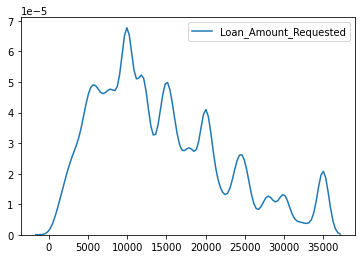

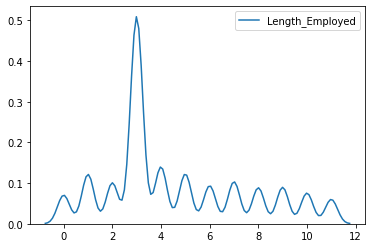

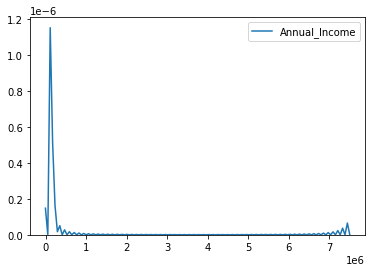

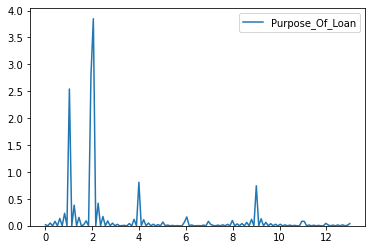

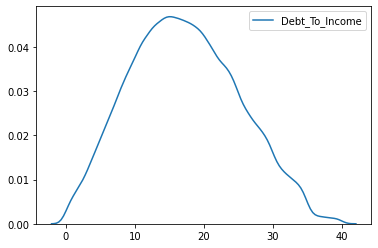

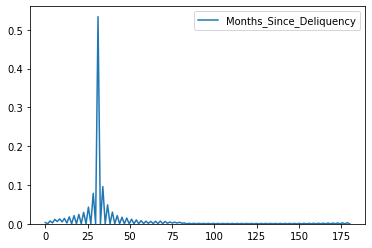

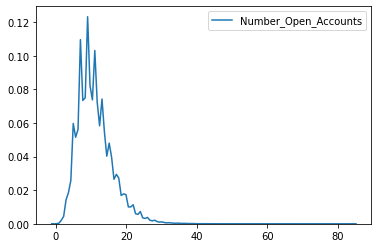

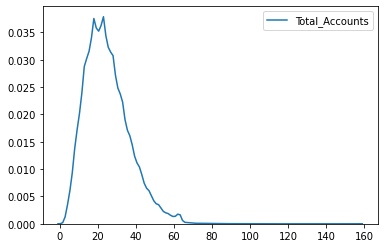

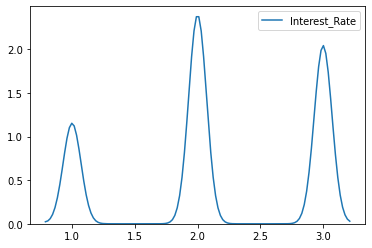

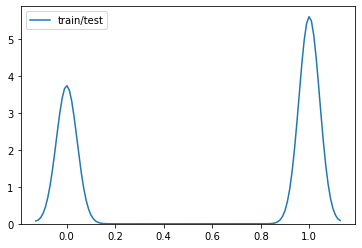

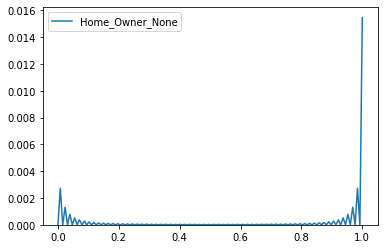

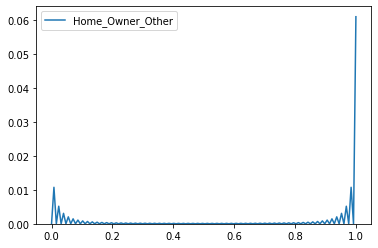

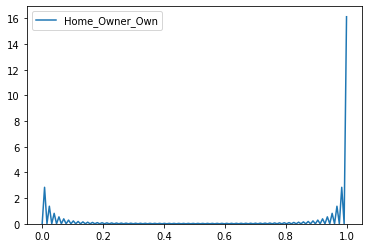

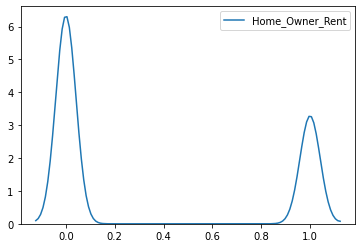

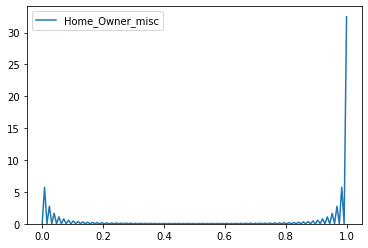

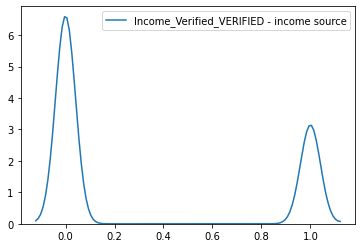

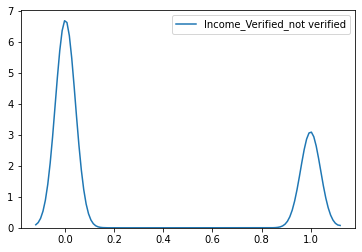

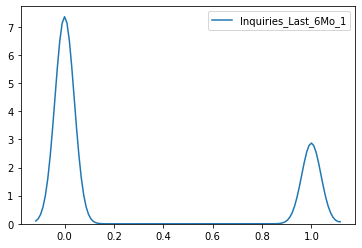

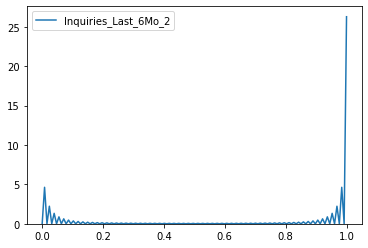

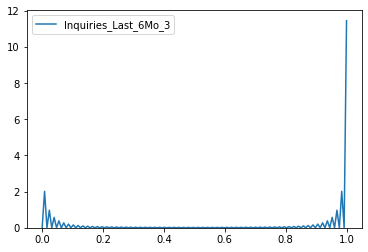

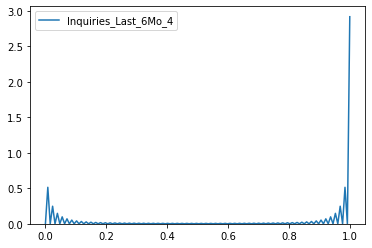

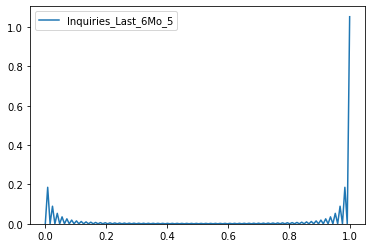

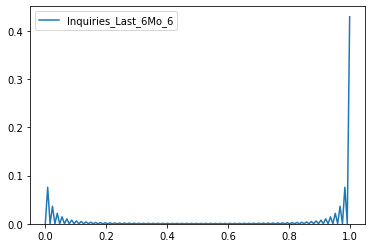

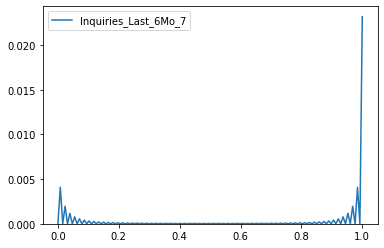

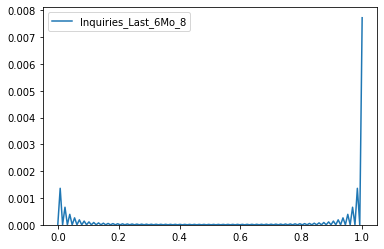

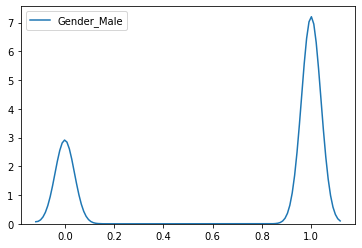

In [81]:
for i in df1.select_dtypes(exclude=['object']).columns:
  sns.kdeplot(df1[i] )
  plt.show()

### final dataframe after dummy/label encoding
(df1)

In [27]:
pip install catboost

     |████████████████████████████████| 64.8MB 60kB/s 


In [28]:
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 24)
y_train shape is  (164309,)
x_test shape is  (109541, 24)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0221237	total: 614ms	remaining: 1m 27s
7:	learn: 1.0158685	total: 704ms	remaining: 1m 27s
8:	learn: 1.0106792	total: 791ms	remaining: 1m 27s
9:	learn: 1.0060381	total: 877ms	remaining: 1m 26s
10:	learn: 1.0012407	total: 961ms	remaining: 1m 26s
11:	learn: 0.9974315	total: 1.05s	remaining: 1m 26s
12:	learn: 0.9936359	total: 1.14s	remaining: 1m 26s
13:	learn: 0.9902189	total: 1.23s	remaining: 1m 26s
14:	learn: 0.9873325	total: 1.31s	remaining: 1m 26s
15:	learn: 0.9844607	total: 1.41s	remaining: 1m 26s
16:	learn: 0.9819404	total: 1.5s	remaining: 1m 26s
17:	learn: 0.9797634	total: 1.59s	remaining: 1m 26s
18:	learn: 0.9769836	total: 1.68s	remaining: 1m 26s
19:	learn: 0.9749336	total: 1.77s	remaining: 1m 26s
20:	learn: 0.9727215	total: 1.86s	remaining: 1m 26s
21:	learn: 0.9709754	total: 1.94s	remaining: 1m 26s
22:	learn: 0.9690726	total: 2.03s	remaining: 1m 26s
23:	learn: 0.9671049	total: 2.11s	remaining: 1m 25s
24:	learn: 0.96573

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lr:0.403770 (0.000056)
knn:0.417085 (0.000010)
rf:0.506143 (0.000018)
nb:0.414856 (0.000016)
rf_boost:0.512278 (0.000009)
gboost:0.511067 (0.000008)


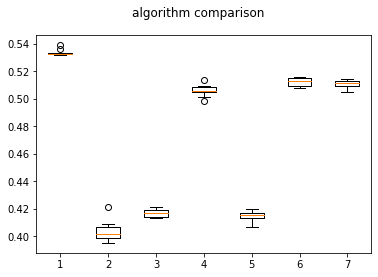

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [86]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0817769	total: 115ms	remaining: 1m 54s
1:	learn: 1.0672890	total: 217ms	remaining: 1m 48s
2:	learn: 1.0550522	total: 313ms	remaining: 1m 44s
3:	learn: 1.0447366	total: 407ms	remaining: 1m 41s
4:	learn: 1.0356527	total: 499ms	remaining: 1m 39s
5:	learn: 1.0279002	total: 601ms	remaining: 1m 39s
6:	learn: 1.0211539	total: 702ms	remaining: 1m 39s
7:	learn: 1.0150334	total: 794ms	remaining: 1m 38s
8:	learn: 1.0098967	total: 888ms	remaining: 1m 37s
9:	learn: 1.0052319	total: 990ms	remaining: 1m 38s
10:	learn: 1.0012446	total: 1.08s	remaining: 1m 37s
11:	learn: 0.9974628	total: 1.19s	remaining: 1m 37s
12:	learn: 0.9937856	total: 1.28s	remaining: 1m 37s
13:	learn: 0.9901686	total: 1.38s	remaining: 1m 37s
14:	learn: 0.9868431	total: 1.47s	remaining: 1m 36s
15:	learn: 0.9842576	total: 1.58s	remaining: 1m 36s
16:	learn: 0.9817173	total: 1.67s	remaining: 1m 36s
17:	learn: 0.9792140	total: 1.76s	remaining: 1m 35s
18:	learn: 0.9764877	total: 1.89s	remaining:

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=lr.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/lr_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=knn.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/knn_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=rf.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/rf_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=nb.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/nb_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/rfboost_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=gboost.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/gboost_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base1.csv')

# base model -2
(with different combination of dummis and label encoding)

In [0]:
df2=df.copy()

In [0]:
label_encoding_list=['Length_Employed','Purpose_Of_Loan','Home_Owner','Inquiries_Last_6Mo']
dummy_list=['Income_Verified','Gender']

In [31]:
df2.groupby(['Gender']).agg({"Interest_Rate":"count"})


Interest_Rate
Gender               
Female          47133
Male           117176

## as we can see few categorical features has more impact on target feature, we shall do label encoding rather than dummy.

In [0]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df2['Length_Employed']=le.fit_transform(df2['Length_Employed'])
le=LabelEncoder()
df2['Purpose_Of_Loan']=le.fit_transform(df2['Purpose_Of_Loan'])
le=LabelEncoder()
df2['Home_Owner']=le.fit_transform(df2['Home_Owner'])
le=LabelEncoder()
df2['Inquiries_Last_6Mo']=le.fit_transform(df2['Inquiries_Last_6Mo'])




df2=pd.get_dummies(data=df2,columns=['Income_Verified','Gender'],drop_first=True)

In [33]:
train=df2[df2['train/test']==1]
test=df2[df2['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0137798	total: 646ms	remaining: 1m 31s
7:	learn: 1.0069456	total: 733ms	remaining: 1m 30s
8:	learn: 1.0014335	total: 824ms	remaining: 1m 30s
9:	learn: 0.9963708	total: 911ms	remaining: 1m 30s
10:	learn: 0.9922569	total: 997ms	remaining: 1m 29s
11:	learn: 0.9885014	total: 1.08s	remaining: 1m 29s
12:	learn: 0.9850088	total: 1.18s	remaining: 1m 29s
13:	learn: 0.9817569	total: 1.26s	remaining: 1m 28s
14:	learn: 0.9785694	total: 1.36s	remaining: 1m 29s
15:	learn: 0.9754946	total: 1.44s	remaining: 1m 28s
16:	learn: 0.9725195	total: 1.53s	remaining: 1m 28s
17:	learn: 0.9697398	total: 1.62s	remaining: 1m 28s
18:	learn: 0.9676257	total: 1.71s	remaining: 1m 28s
19:	learn: 0.9656490	total: 1.8s	remaining: 1m 28s
20:	learn: 0.9639461	total: 1.89s	remaining: 1m 27s
21:	learn: 0.9623072	total: 1.97s	remaining: 1m 27s
22:	learn: 0.9602602	total: 2.06s	remaining: 1m 27s
23:	learn: 0.9588128	total: 2.15s	remaining: 1m 27s
24:	learn: 0.95738

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lr:0.407370 (0.000063)
knn:0.417474 (0.000009)
rf:0.508349 (0.000014)
nb:0.420305 (0.000019)
rf_boost:0.513612 (0.000010)
gboost:0.515601 (0.000008)


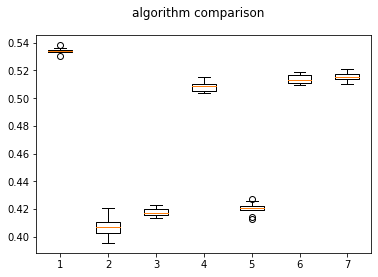

In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [109]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0792410	total: 104ms	remaining: 1m 43s
1:	learn: 1.0633591	total: 199ms	remaining: 1m 39s
2:	learn: 1.0503817	total: 303ms	remaining: 1m 40s
3:	learn: 1.0385922	total: 400ms	remaining: 1m 39s
4:	learn: 1.0292306	total: 498ms	remaining: 1m 39s
5:	learn: 1.0204274	total: 598ms	remaining: 1m 39s
6:	learn: 1.0130412	total: 700ms	remaining: 1m 39s
7:	learn: 1.0068206	total: 795ms	remaining: 1m 38s
8:	learn: 1.0013166	total: 890ms	remaining: 1m 38s
9:	learn: 0.9960765	total: 988ms	remaining: 1m 37s
10:	learn: 0.9917988	total: 1.09s	remaining: 1m 37s
11:	learn: 0.9878989	total: 1.18s	remaining: 1m 37s
12:	learn: 0.9844121	total: 1.29s	remaining: 1m 38s
13:	learn: 0.9810511	total: 1.39s	remaining: 1m 37s
14:	learn: 0.9780813	total: 1.48s	remaining: 1m 36s
15:	learn: 0.9750428	total: 1.57s	remaining: 1m 36s
16:	learn: 0.9725709	total: 1.67s	remaining: 1m 36s
17:	learn: 0.9701831	total: 1.76s	remaining: 1m 35s
18:	learn: 0.9682473	total: 1.86s	remaining:

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=lr.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/lr_base2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=knn.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/knn_base2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=rf.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/rf_base2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=nb.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/nb_base2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/rfboost_base2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=gboost.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/gboost_base2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2.csv')

# Imrovement on base model

In [158]:
df3=df2.copy()
df3.head()

Loan_Amount_Requested  ...  Gender_Male
0                 7000.0  ...            0
1                30000.0  ...            0
2                24725.0  ...            1
3                16000.0  ...            1
4                17000.0  ...            0

[5 rows x 15 columns]

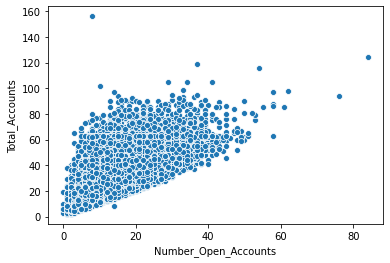

In [159]:
sns.scatterplot(x='Number_Open_Accounts',y="Total_Accounts",data=df3,)
plt.show()

# trying to create new feature Total_Accounts/Number_Open_Accounts

In [0]:
df3['TotalAc/openAC']=df3['Number_Open_Accounts']/df3['Total_Accounts']

In [0]:
df3=df3.drop(columns=['Number_Open_Accounts','Total_Accounts'],axis=1)

In [164]:
train=df3[df3['train/test']==1]
test=df3[df3['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 12)
y_train shape is  (164309,)
x_test shape is  (109541, 12)


Streaming output truncated to the last 5000 lines.
9:	learn: 0.9971107	total: 874ms	remaining: 1m 26s
10:	learn: 0.9930516	total: 961ms	remaining: 1m 26s
11:	learn: 0.9888807	total: 1.06s	remaining: 1m 27s
12:	learn: 0.9850941	total: 1.14s	remaining: 1m 26s
13:	learn: 0.9818732	total: 1.22s	remaining: 1m 26s
14:	learn: 0.9788562	total: 1.32s	remaining: 1m 26s
15:	learn: 0.9762603	total: 1.42s	remaining: 1m 27s
16:	learn: 0.9737315	total: 1.5s	remaining: 1m 26s
17:	learn: 0.9709901	total: 1.59s	remaining: 1m 26s
18:	learn: 0.9685764	total: 1.68s	remaining: 1m 26s
19:	learn: 0.9664799	total: 1.76s	remaining: 1m 26s
20:	learn: 0.9647781	total: 1.85s	remaining: 1m 26s
21:	learn: 0.9631890	total: 1.93s	remaining: 1m 25s
22:	learn: 0.9615433	total: 2.02s	remaining: 1m 25s
23:	learn: 0.9601866	total: 2.1s	remaining: 1m 25s
24:	learn: 0.9586764	total: 2.19s	remaining: 1m 25s
25:	learn: 0.9573303	total: 2.27s	remaining: 1m 25s
26:	learn: 0.9563144	total: 2.36s	remaining: 1m 25s
27:	learn: 0.955

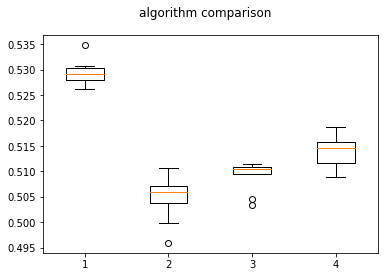

In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


results=[]
names=[]
models=[]
lr=LogisticRegression()
knn=KNeighborsClassifier()
#svm=SVC(probability=True)
rf=RandomForestClassifier()
nb=GaussianNB()
rf_boost=AdaBoostClassifier()
gboost=GradientBoostingClassifier()
cbc=CatBoostClassifier()

models.append(('cbc',cbc))
#models.append(('lr',lr))
#models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
#models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [166]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0792431	total: 97.5ms	remaining: 1m 37s
1:	learn: 1.0636974	total: 194ms	remaining: 1m 36s
2:	learn: 1.0503756	total: 292ms	remaining: 1m 37s
3:	learn: 1.0389655	total: 389ms	remaining: 1m 36s
4:	learn: 1.0291501	total: 484ms	remaining: 1m 36s
5:	learn: 1.0208357	total: 595ms	remaining: 1m 38s
6:	learn: 1.0141139	total: 693ms	remaining: 1m 38s
7:	learn: 1.0078270	total: 785ms	remaining: 1m 37s
8:	learn: 1.0022986	total: 881ms	remaining: 1m 37s
9:	learn: 0.9974376	total: 979ms	remaining: 1m 36s
10:	learn: 0.9931336	total: 1.07s	remaining: 1m 36s
11:	learn: 0.9892297	total: 1.17s	remaining: 1m 36s
12:	learn: 0.9853008	total: 1.27s	remaining: 1m 36s
13:	learn: 0.9819535	total: 1.36s	remaining: 1m 35s
14:	learn: 0.9791098	total: 1.46s	remaining: 1m 35s
15:	learn: 0.9767082	total: 1.57s	remaining: 1m 36s
16:	learn: 0.9742480	total: 1.67s	remaining: 1m 36s
17:	learn: 0.9716954	total: 1.76s	remaining: 1m 35s
18:	learn: 0.9690497	total: 1.85s	remaining

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=rf.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/rf_base2fe2.csv',index=False)


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=rf_boost.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/rfboost_base2fe2.csv',index=False)


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=gboost.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/gboost_base2fe2.csv',index=False)


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe2.csv',index=False)

# feature engineering
(df2-best)

#### binning classes of "Inquiries_Last_6Mo"

In [0]:
df4=df2.copy()

In [59]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_Amount_Requested                     273850 non-null  float64
 1   Length_Employed                           273850 non-null  int64  
 2   Home_Owner                                273850 non-null  int64  
 3   Annual_Income                             273850 non-null  float64
 4   Purpose_Of_Loan                           273850 non-null  int64  
 5   Debt_To_Income                            273850 non-null  float64
 6   Inquiries_Last_6Mo                        273850 non-null  int64  
 7   Months_Since_Deliquency                   273850 non-null  float64
 8   Number_Open_Accounts                      273850 non-null  int64  
 9   Total_Accounts                            273850 non-null  int64  
 10  Interest_Rate       

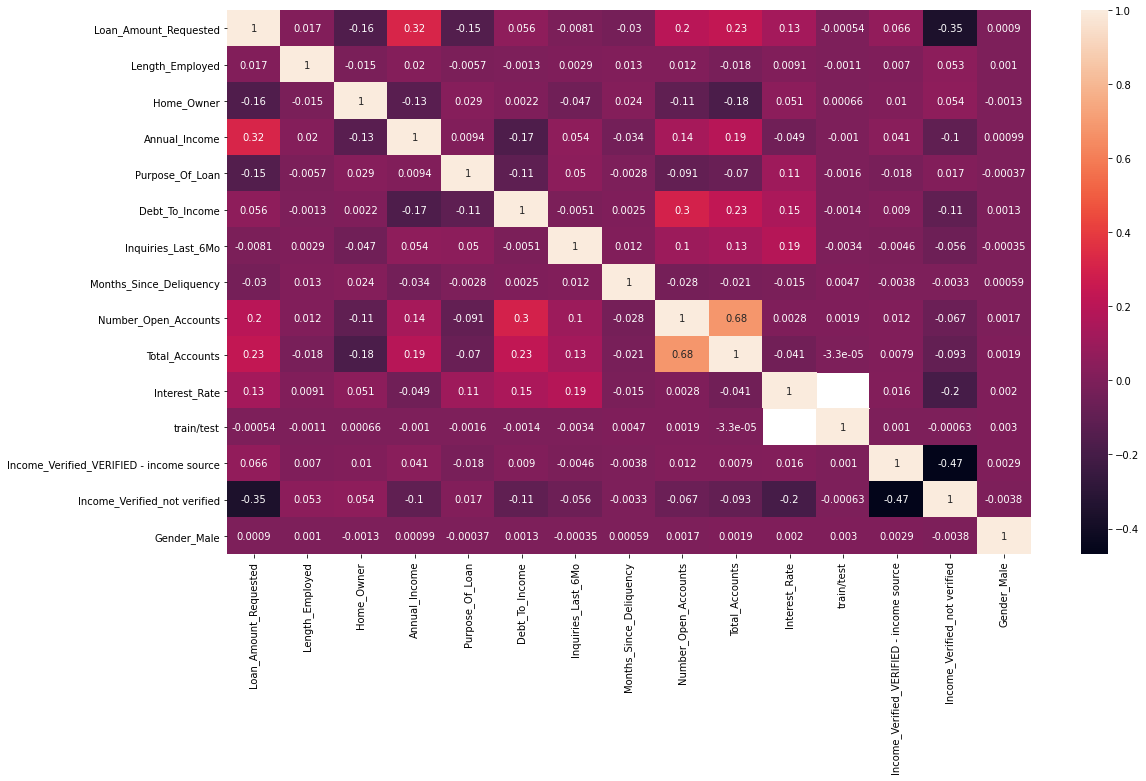

In [175]:
plt.figure(figsize=(18,10))
sns.heatmap(df4.corr(),annot=True)
plt.show()

In [180]:
!pip install ppscore



  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=f8b16a33a53cf4e84aecf104609b37fb2d25a1ddb4aec02a9e91c1349473780b
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


# Predictive Power Score

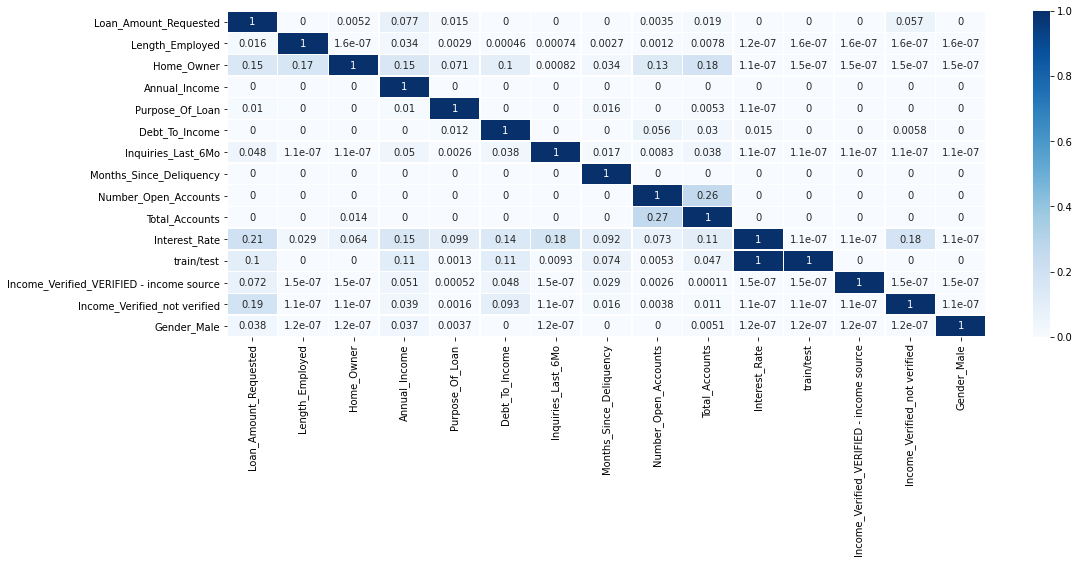

In [182]:
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df_matrix = pps.matrix(df4)
plt.figure(figsize=(17,6))
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
import warnings
warnings.filterwarnings('ignore')

#inference:
we can see whci feature is better predictor of other features.
ex: "number of open accounts" is a good predictor of "total accounts." 
this is different from correlation plot as correlation plot is linear is nature. and also correaltion plot doesnt say much about categorical feature.

In [60]:
df4['Inquiries_Last_6Mo'].value_counts()*100/df.shape[0]

0    52.030674
1    28.041263
2    12.417747
3     5.415008
4     1.379953
5     0.497718
6     0.203031
7     0.010955
8     0.003652
Name: Inquiries_Last_6Mo, dtype: float64

In [0]:
def club_class(x):
  if x in [3,4,5,6,7,8]:
    return(3)
  else:
    return(x)
df4['Inquiries_Last_6Mo']=df4['Inquiries_Last_6Mo'].apply(club_class)

In [62]:
df4['Inquiries_Last_6Mo'].value_counts()*100/df.shape[0]

0    52.030674
1    28.041263
2    12.417747
3     7.510316
Name: Inquiries_Last_6Mo, dtype: float64

In [63]:
train=df4[df4['train/test']==1]
test=df4[df4['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0137798	total: 619ms	remaining: 1m 27s
7:	learn: 1.0069456	total: 704ms	remaining: 1m 27s
8:	learn: 1.0014335	total: 798ms	remaining: 1m 27s
9:	learn: 0.9963708	total: 884ms	remaining: 1m 27s
10:	learn: 0.9922569	total: 970ms	remaining: 1m 27s
11:	learn: 0.9885014	total: 1.06s	remaining: 1m 27s
12:	learn: 0.9850088	total: 1.15s	remaining: 1m 27s
13:	learn: 0.9817569	total: 1.23s	remaining: 1m 26s
14:	learn: 0.9785694	total: 1.31s	remaining: 1m 26s
15:	learn: 0.9754946	total: 1.4s	remaining: 1m 26s
16:	learn: 0.9725195	total: 1.5s	remaining: 1m 26s
17:	learn: 0.9697398	total: 1.59s	remaining: 1m 26s
18:	learn: 0.9676257	total: 1.68s	remaining: 1m 26s
19:	learn: 0.9656490	total: 1.76s	remaining: 1m 26s
20:	learn: 0.9639461	total: 1.84s	remaining: 1m 26s
21:	learn: 0.9623072	total: 1.93s	remaining: 1m 25s
22:	learn: 0.9602602	total: 2.01s	remaining: 1m 25s
23:	learn: 0.9588128	total: 2.11s	remaining: 1m 25s
24:	learn: 0.957384

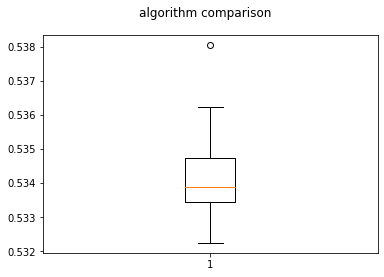

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [65]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0792410	total: 114ms	remaining: 1m 53s
1:	learn: 1.0633591	total: 217ms	remaining: 1m 48s
2:	learn: 1.0503817	total: 318ms	remaining: 1m 45s
3:	learn: 1.0385922	total: 412ms	remaining: 1m 42s
4:	learn: 1.0292306	total: 524ms	remaining: 1m 44s
5:	learn: 1.0204274	total: 620ms	remaining: 1m 42s
6:	learn: 1.0130412	total: 718ms	remaining: 1m 41s
7:	learn: 1.0068206	total: 814ms	remaining: 1m 40s
8:	learn: 1.0013166	total: 910ms	remaining: 1m 40s
9:	learn: 0.9960765	total: 1.01s	remaining: 1m 40s
10:	learn: 0.9917988	total: 1.11s	remaining: 1m 39s
11:	learn: 0.9878989	total: 1.2s	remaining: 1m 38s
12:	learn: 0.9844121	total: 1.3s	remaining: 1m 38s
13:	learn: 0.9810511	total: 1.4s	remaining: 1m 38s
14:	learn: 0.9780813	total: 1.5s	remaining: 1m 38s
15:	learn: 0.9750428	total: 1.59s	remaining: 1m 37s
16:	learn: 0.9725709	total: 1.68s	remaining: 1m 37s
17:	learn: 0.9701831	total: 1.77s	remaining: 1m 36s
18:	learn: 0.9682473	total: 1.87s	remaining: 1m 

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe42.csv',index=False)

# transforming Numerical columns

In [0]:
df5=df2.copy()

#biox cox transformation is a tool used for power transformations. we can check the value of lambda here to understand which transformation works bettter with the data selected.

In [147]:
from scipy.stats import boxcox
df5['Loan_Amount_Requested'],lam = boxcox(df5['Loan_Amount_Requested'])
print(lam)

0.382983624998839


In [0]:
df5['Annual_Income']=np.log(df5['Annual_Income']+1)

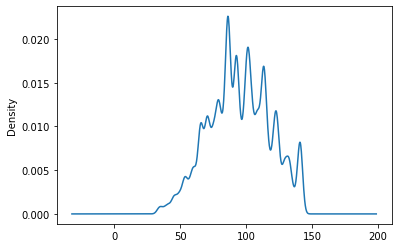

In [149]:
df5['Loan_Amount_Requested'].plot(kind='kde')

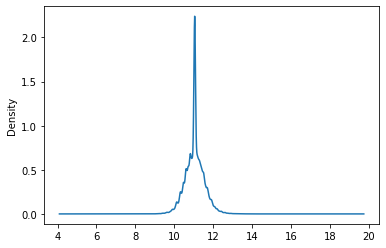

In [150]:
df5['Annual_Income'].plot(kind="kde")

In [152]:
train=df5[df5['train/test']==1]
test=df5[df5['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0137798	total: 630ms	remaining: 1m 29s
7:	learn: 1.0069456	total: 727ms	remaining: 1m 30s
8:	learn: 1.0014335	total: 815ms	remaining: 1m 29s
9:	learn: 0.9963708	total: 912ms	remaining: 1m 30s
10:	learn: 0.9922569	total: 1s	remaining: 1m 29s
11:	learn: 0.9885014	total: 1.08s	remaining: 1m 29s
12:	learn: 0.9850088	total: 1.17s	remaining: 1m 29s
13:	learn: 0.9817585	total: 1.26s	remaining: 1m 28s
14:	learn: 0.9785702	total: 1.34s	remaining: 1m 28s
15:	learn: 0.9754954	total: 1.43s	remaining: 1m 27s
16:	learn: 0.9725201	total: 1.52s	remaining: 1m 27s
17:	learn: 0.9697405	total: 1.61s	remaining: 1m 28s
18:	learn: 0.9676262	total: 1.7s	remaining: 1m 27s
19:	learn: 0.9656489	total: 1.79s	remaining: 1m 27s
20:	learn: 0.9639458	total: 1.89s	remaining: 1m 28s
21:	learn: 0.9623065	total: 1.97s	remaining: 1m 27s
22:	learn: 0.9602595	total: 2.07s	remaining: 1m 27s
23:	learn: 0.9588136	total: 2.15s	remaining: 1m 27s
24:	learn: 0.9573857	

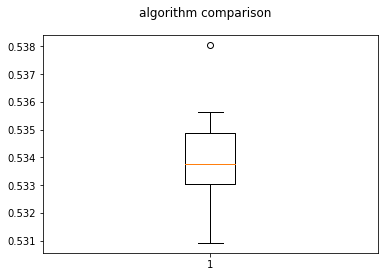

In [153]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [154]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0792410	total: 103ms	remaining: 1m 42s
1:	learn: 1.0633591	total: 217ms	remaining: 1m 48s
2:	learn: 1.0503817	total: 329ms	remaining: 1m 49s
3:	learn: 1.0385922	total: 430ms	remaining: 1m 46s
4:	learn: 1.0292306	total: 535ms	remaining: 1m 46s
5:	learn: 1.0204274	total: 637ms	remaining: 1m 45s
6:	learn: 1.0130412	total: 742ms	remaining: 1m 45s
7:	learn: 1.0068206	total: 836ms	remaining: 1m 43s
8:	learn: 1.0013166	total: 935ms	remaining: 1m 42s
9:	learn: 0.9960765	total: 1.04s	remaining: 1m 42s
10:	learn: 0.9917988	total: 1.13s	remaining: 1m 41s
11:	learn: 0.9878989	total: 1.23s	remaining: 1m 41s
12:	learn: 0.9844121	total: 1.34s	remaining: 1m 41s
13:	learn: 0.9810511	total: 1.44s	remaining: 1m 41s
14:	learn: 0.9780813	total: 1.53s	remaining: 1m 40s
15:	learn: 0.9750428	total: 1.63s	remaining: 1m 40s
16:	learn: 0.9725709	total: 1.73s	remaining: 1m 40s
17:	learn: 0.9701831	total: 1.82s	remaining: 1m 39s
18:	learn: 0.9682473	total: 1.92s	remaining:

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe52.csv',index=False)

# feature engineering : (income/loan amount)


In [0]:
df6=df2.copy()

In [0]:
df6['loan/income']=df6['Loan_Amount_Requested']/df6['Annual_Income']

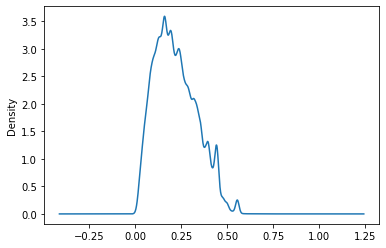

In [161]:
df6['loan/income'].plot(kind='kde')

In [162]:
train=df6[df6['train/test']==1]
test=df6[df6['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 14)
y_train shape is  (164309,)
x_test shape is  (109541, 14)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0114270	total: 628ms	remaining: 1m 29s
7:	learn: 1.0049950	total: 721ms	remaining: 1m 29s
8:	learn: 0.9992919	total: 812ms	remaining: 1m 29s
9:	learn: 0.9950156	total: 896ms	remaining: 1m 28s
10:	learn: 0.9902613	total: 983ms	remaining: 1m 28s
11:	learn: 0.9860156	total: 1.07s	remaining: 1m 28s
12:	learn: 0.9824098	total: 1.17s	remaining: 1m 28s
13:	learn: 0.9794389	total: 1.25s	remaining: 1m 28s
14:	learn: 0.9762498	total: 1.35s	remaining: 1m 28s
15:	learn: 0.9731798	total: 1.43s	remaining: 1m 28s
16:	learn: 0.9706649	total: 1.53s	remaining: 1m 28s
17:	learn: 0.9685441	total: 1.62s	remaining: 1m 28s
18:	learn: 0.9665289	total: 1.71s	remaining: 1m 28s
19:	learn: 0.9647921	total: 1.8s	remaining: 1m 28s
20:	learn: 0.9623460	total: 1.89s	remaining: 1m 28s
21:	learn: 0.9604071	total: 1.98s	remaining: 1m 28s
22:	learn: 0.9588867	total: 2.07s	remaining: 1m 27s
23:	learn: 0.9577003	total: 2.15s	remaining: 1m 27s
24:	learn: 0.95620

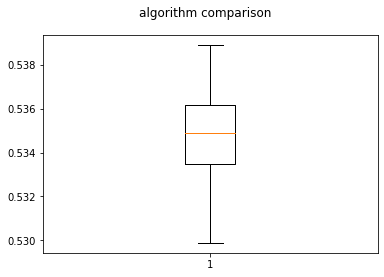

In [163]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [164]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0783365	total: 104ms	remaining: 1m 44s
1:	learn: 1.0617294	total: 205ms	remaining: 1m 42s
2:	learn: 1.0480987	total: 310ms	remaining: 1m 43s
3:	learn: 1.0370288	total: 411ms	remaining: 1m 42s
4:	learn: 1.0268050	total: 518ms	remaining: 1m 43s
5:	learn: 1.0184532	total: 625ms	remaining: 1m 43s
6:	learn: 1.0112236	total: 728ms	remaining: 1m 43s
7:	learn: 1.0046267	total: 832ms	remaining: 1m 43s
8:	learn: 0.9988461	total: 935ms	remaining: 1m 42s
9:	learn: 0.9939464	total: 1.04s	remaining: 1m 42s
10:	learn: 0.9890417	total: 1.13s	remaining: 1m 41s
11:	learn: 0.9848609	total: 1.23s	remaining: 1m 41s
12:	learn: 0.9811700	total: 1.33s	remaining: 1m 41s
13:	learn: 0.9783434	total: 1.43s	remaining: 1m 40s
14:	learn: 0.9754006	total: 1.53s	remaining: 1m 40s
15:	learn: 0.9727337	total: 1.63s	remaining: 1m 40s
16:	learn: 0.9703559	total: 1.73s	remaining: 1m 39s
17:	learn: 0.9681456	total: 1.83s	remaining: 1m 39s
18:	learn: 0.9663269	total: 1.93s	remaining:

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe6.csv',index=False)

#feature engineering
(creating features resembling credit score)
(good cleaned data df2)

In [58]:
df7=df2.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_Amount_Requested                     273850 non-null  float64
 1   Length_Employed                           273850 non-null  int64  
 2   Home_Owner                                273850 non-null  int64  
 3   Annual_Income                             273850 non-null  float64
 4   Purpose_Of_Loan                           273850 non-null  int64  
 5   Debt_To_Income                            273850 non-null  float64
 6   Inquiries_Last_6Mo                        273850 non-null  int64  
 7   Months_Since_Deliquency                   273850 non-null  float64
 8   Number_Open_Accounts                      273850 non-null  int64  
 9   Total_Accounts                            273850 non-null  int64  
 10  Interest_Rate       

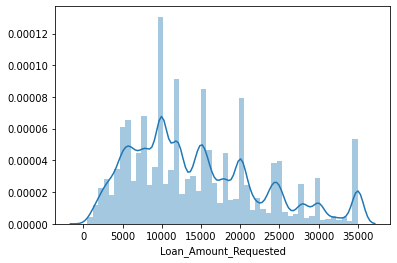

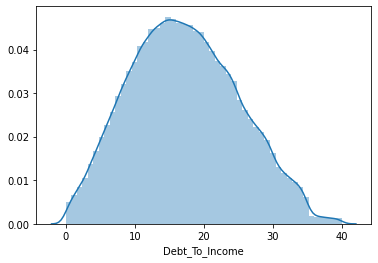

In [56]:
sns.distplot(df2['Loan_Amount_Requested'])
plt.show()

sns.distplot(df2['Debt_To_Income'])


In [61]:
df.groupby(['Home_Owner']).agg({"Loan_Amount_Requested":'mean'})

Loan_Amount_Requested
Home_Owner                       
Mortgage             16030.322973
None                 13067.500000
Other                11604.113924
Own                  13552.940754
Rent                 12444.681801
misc                 14323.361864

# feature engineering:  to better understand relation between 'home_owner' and 'loan_amount_requested'

In [0]:
df_fe=df.copy()

In [0]:
df_fe['OwnerType_LoanRequested']=df_fe['Home_Owner'].map({"Mortgage":16030.322973,"None":13067.500000,"Other":11604.113924,"Own":13552.940754,"Rent":12444.681801,"misc":14323.361864})

In [0]:
df7['OwnerType_LoanRequested']=df_fe['OwnerType_LoanRequested']

In [71]:
df7=df7.drop(columns=['Home_Owner'],axis=1)
df7.head()

Loan_Amount_Requested  Length_Employed  ...  Gender_Male  OwnerType_LoanRequested
0                 7000.0                1  ...            0             12444.681801
1                30000.0                6  ...            0             16030.322973
2                24725.0                9  ...            1             16030.322973
3                16000.0                1  ...            1             14323.361864
4                17000.0               10  ...            0             13552.940754

[5 rows x 15 columns]

In [72]:
train=df7[df7['train/test']==1]
test=df7[df7['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0138714	total: 617ms	remaining: 1m 27s
7:	learn: 1.0076160	total: 700ms	remaining: 1m 26s
8:	learn: 1.0017798	total: 793ms	remaining: 1m 27s
9:	learn: 0.9966740	total: 878ms	remaining: 1m 26s
10:	learn: 0.9916182	total: 964ms	remaining: 1m 26s
11:	learn: 0.9874553	total: 1.06s	remaining: 1m 27s
12:	learn: 0.9837354	total: 1.15s	remaining: 1m 27s
13:	learn: 0.9803594	total: 1.23s	remaining: 1m 26s
14:	learn: 0.9772253	total: 1.32s	remaining: 1m 27s
15:	learn: 0.9744767	total: 1.41s	remaining: 1m 26s
16:	learn: 0.9717277	total: 1.49s	remaining: 1m 26s
17:	learn: 0.9694045	total: 1.58s	remaining: 1m 26s
18:	learn: 0.9675473	total: 1.67s	remaining: 1m 26s
19:	learn: 0.9651746	total: 1.75s	remaining: 1m 25s
20:	learn: 0.9632917	total: 1.85s	remaining: 1m 26s
21:	learn: 0.9615993	total: 1.93s	remaining: 1m 25s
22:	learn: 0.9600002	total: 2.01s	remaining: 1m 25s
23:	learn: 0.9581425	total: 2.1s	remaining: 1m 25s
24:	learn: 0.95682

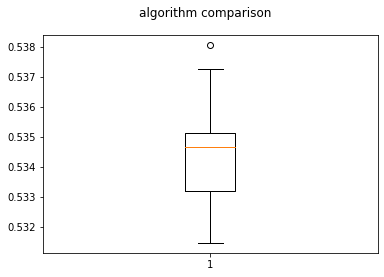

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [74]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0799841	total: 94.1ms	remaining: 1m 34s
1:	learn: 1.0642967	total: 189ms	remaining: 1m 34s
2:	learn: 1.0506726	total: 282ms	remaining: 1m 33s
3:	learn: 1.0396357	total: 388ms	remaining: 1m 36s
4:	learn: 1.0300243	total: 485ms	remaining: 1m 36s
5:	learn: 1.0209020	total: 579ms	remaining: 1m 35s
6:	learn: 1.0138624	total: 681ms	remaining: 1m 36s
7:	learn: 1.0077864	total: 770ms	remaining: 1m 35s
8:	learn: 1.0021512	total: 869ms	remaining: 1m 35s
9:	learn: 0.9969928	total: 968ms	remaining: 1m 35s
10:	learn: 0.9926760	total: 1.06s	remaining: 1m 35s
11:	learn: 0.9885802	total: 1.15s	remaining: 1m 34s
12:	learn: 0.9845154	total: 1.25s	remaining: 1m 35s
13:	learn: 0.9810189	total: 1.35s	remaining: 1m 34s
14:	learn: 0.9778018	total: 1.45s	remaining: 1m 35s
15:	learn: 0.9753841	total: 1.54s	remaining: 1m 34s
16:	learn: 0.9726361	total: 1.64s	remaining: 1m 34s
17:	learn: 0.9704003	total: 1.73s	remaining: 1m 34s
18:	learn: 0.9681990	total: 1.82s	remaining

In [0]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe71.csv',index=False)

# feature engineering : (debt_income ratio * (open ac/ total ac)

In [0]:
df8=df2.copy()

In [0]:
df8['debt_openac_risk']=df8['Debt_To_Income']*(df8['Number_Open_Accounts']/df8['Total_Accounts'])

In [80]:
df8.head()

Loan_Amount_Requested  Length_Employed  ...  Gender_Male  debt_openac_risk
0                 7000.0                1  ...            0         11.809286
1                30000.0                6  ...            0          7.465000
2                24725.0                9  ...            1         11.910000
3                16000.0                1  ...            1         10.429091
4                17000.0               10  ...            0         14.041000

[5 rows x 16 columns]

In [82]:
train=df8[df8['train/test']==1]
test=df8[df8['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 14)
y_train shape is  (164309,)
x_test shape is  (109541, 14)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0130040	total: 622ms	remaining: 1m 28s
7:	learn: 1.0066333	total: 707ms	remaining: 1m 27s
8:	learn: 1.0008106	total: 795ms	remaining: 1m 27s
9:	learn: 0.9959648	total: 886ms	remaining: 1m 27s
10:	learn: 0.9915541	total: 969ms	remaining: 1m 27s
11:	learn: 0.9868474	total: 1.06s	remaining: 1m 27s
12:	learn: 0.9832007	total: 1.15s	remaining: 1m 27s
13:	learn: 0.9799240	total: 1.24s	remaining: 1m 27s
14:	learn: 0.9768496	total: 1.33s	remaining: 1m 27s
15:	learn: 0.9739753	total: 1.44s	remaining: 1m 28s
16:	learn: 0.9714955	total: 1.52s	remaining: 1m 28s
17:	learn: 0.9692747	total: 1.61s	remaining: 1m 27s
18:	learn: 0.9672218	total: 1.7s	remaining: 1m 27s
19:	learn: 0.9653871	total: 1.78s	remaining: 1m 27s
20:	learn: 0.9633250	total: 1.86s	remaining: 1m 26s
21:	learn: 0.9613718	total: 1.95s	remaining: 1m 26s
22:	learn: 0.9596561	total: 2.03s	remaining: 1m 26s
23:	learn: 0.9582613	total: 2.12s	remaining: 1m 26s
24:	learn: 0.95679

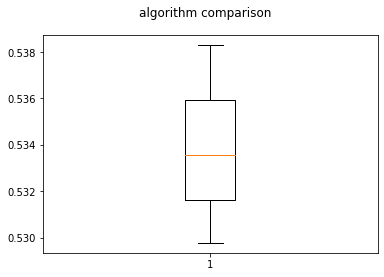

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [84]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0789537	total: 96.9ms	remaining: 1m 36s
1:	learn: 1.0623948	total: 205ms	remaining: 1m 42s
2:	learn: 1.0487531	total: 303ms	remaining: 1m 40s
3:	learn: 1.0375999	total: 395ms	remaining: 1m 38s
4:	learn: 1.0274964	total: 494ms	remaining: 1m 38s
5:	learn: 1.0196106	total: 597ms	remaining: 1m 38s
6:	learn: 1.0127410	total: 699ms	remaining: 1m 39s
7:	learn: 1.0061756	total: 790ms	remaining: 1m 37s
8:	learn: 1.0005414	total: 890ms	remaining: 1m 38s
9:	learn: 0.9953232	total: 989ms	remaining: 1m 37s
10:	learn: 0.9907636	total: 1.08s	remaining: 1m 37s
11:	learn: 0.9867895	total: 1.18s	remaining: 1m 37s
12:	learn: 0.9831183	total: 1.28s	remaining: 1m 37s
13:	learn: 0.9801911	total: 1.37s	remaining: 1m 36s
14:	learn: 0.9771744	total: 1.47s	remaining: 1m 36s
15:	learn: 0.9741440	total: 1.57s	remaining: 1m 36s
16:	learn: 0.9717737	total: 1.66s	remaining: 1m 35s
17:	learn: 0.9694668	total: 1.75s	remaining: 1m 35s
18:	learn: 0.9670908	total: 1.86s	remaining

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe8.csv',index=False)

# feature engineering : ("inquiries last 6 month" /  "total open accounts"

In [88]:
df8['Inquiries_Last_6Mo'].value_counts()

0    142486
1     76791
2     34006
3     14829
4      3779
5      1363
6       556
7        30
8        10
Name: Inquiries_Last_6Mo, dtype: int64

In [0]:
df9=df2.copy()

In [0]:
rows_drop=list(df8[df8['Number_Open_Accounts']==0].index)

In [0]:
df9=df2.drop(index=rows_drop,axis=0)

In [104]:
df9['inquries_per_open_ac']=df9['Inquiries_Last_6Mo']/df9['Number_Open_Accounts']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df9.head()

Loan_Amount_Requested  Length_Employed  ...  Gender_Male  inquries_per_open_ac
0                 7000.0                1  ...            0              0.000000
1                30000.0                6  ...            0              0.000000
2                24725.0                9  ...            1              0.000000
3                16000.0                1  ...            1              0.187500
4                17000.0               10  ...            0              0.052632

[5 rows x 16 columns]

In [107]:
train=df9[df9['train/test']==1]
test=df9[df9['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164304, 14)
y_train shape is  (164304,)
x_test shape is  (109536, 14)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0138676	total: 656ms	remaining: 1m 33s
7:	learn: 1.0071705	total: 742ms	remaining: 1m 31s
8:	learn: 1.0017813	total: 835ms	remaining: 1m 31s
9:	learn: 0.9968405	total: 919ms	remaining: 1m 30s
10:	learn: 0.9926287	total: 1.01s	remaining: 1m 30s
11:	learn: 0.9884167	total: 1.09s	remaining: 1m 29s
12:	learn: 0.9848921	total: 1.18s	remaining: 1m 29s
13:	learn: 0.9818193	total: 1.28s	remaining: 1m 29s
14:	learn: 0.9786817	total: 1.36s	remaining: 1m 29s
15:	learn: 0.9753741	total: 1.45s	remaining: 1m 29s
16:	learn: 0.9732234	total: 1.53s	remaining: 1m 28s
17:	learn: 0.9710692	total: 1.62s	remaining: 1m 28s
18:	learn: 0.9692683	total: 1.71s	remaining: 1m 28s
19:	learn: 0.9669844	total: 1.8s	remaining: 1m 28s
20:	learn: 0.9647392	total: 1.88s	remaining: 1m 27s
21:	learn: 0.9631256	total: 1.97s	remaining: 1m 27s
22:	learn: 0.9609968	total: 2.06s	remaining: 1m 27s
23:	learn: 0.9594785	total: 2.13s	remaining: 1m 26s
24:	learn: 0.95798

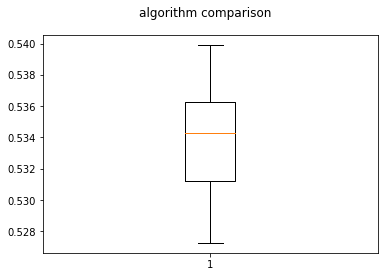

In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [109]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0801012	total: 122ms	remaining: 2m 1s
1:	learn: 1.0640108	total: 222ms	remaining: 1m 50s
2:	learn: 1.0503531	total: 317ms	remaining: 1m 45s
3:	learn: 1.0390668	total: 414ms	remaining: 1m 43s
4:	learn: 1.0289814	total: 513ms	remaining: 1m 42s
5:	learn: 1.0204298	total: 607ms	remaining: 1m 40s
6:	learn: 1.0129732	total: 705ms	remaining: 1m 40s
7:	learn: 1.0067516	total: 818ms	remaining: 1m 41s
8:	learn: 1.0015629	total: 919ms	remaining: 1m 41s
9:	learn: 0.9964850	total: 1.02s	remaining: 1m 40s
10:	learn: 0.9920231	total: 1.11s	remaining: 1m 39s
11:	learn: 0.9882447	total: 1.2s	remaining: 1m 39s
12:	learn: 0.9845084	total: 1.31s	remaining: 1m 39s
13:	learn: 0.9814242	total: 1.4s	remaining: 1m 38s
14:	learn: 0.9782176	total: 1.5s	remaining: 1m 38s
15:	learn: 0.9752367	total: 1.59s	remaining: 1m 37s
16:	learn: 0.9726247	total: 1.68s	remaining: 1m 37s
17:	learn: 0.9703318	total: 1.78s	remaining: 1m 36s
18:	learn: 0.9684588	total: 1.88s	remaining: 1m 

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe9.csv',index=False)

# feature engineering : frequency percentage of feature "Months_Since_Deliquency"

In [0]:
df10=df2.copy()

In [126]:

deliq=pd.DataFrame(df10['Months_Since_Deliquency'].value_counts(normalize=True)*100)
df_ff=deliq.reset_index()
df_ff

index  Months_Since_Deliquency
0     31.0                54.452437
1      9.0                 0.943947
2      8.0                 0.918386
3     13.0                 0.911448
4     12.0                 0.903049
5     10.0                 0.899397
6     14.0                 0.889903
7      6.0                 0.868359
8     15.0                 0.865072
9      7.0                 0.865072
10    18.0                 0.851561
11    19.0                 0.828556
12    11.0                 0.824174
13    17.0                 0.818696
14    16.0                 0.815410
15    20.0                 0.802264
16    21.0                 0.766478
17    27.0                 0.754793
18    23.0                 0.741282
19    22.0                 0.735439
20    26.0                 0.731787
21    25.0                 0.721563
22    28.0                 0.712434
23    24.0                 0.710243
24    29.0                 0.689429
25    33.0                 0.687968
26     5.0                 0.679569
27    30.0                 0.677743
28    35.0                 0.663867
29    34.0                 0.661311
30    36.0                 0.660946
31    38.0                 0.654373
32    32.0                 0.649991
33    42.0                 0.635749
34    37.0                 0.632098
35    39.0                 0.623334
36    45.0                 0.617126
37    40.0                 0.614570
38    41.0                 0.603250
39    44.0                 0.601789
40    43.0                 0.598868
41    48.0                 0.591930
42    46.0                 0.589009
43    47.0                 0.582801
44     4.0                 0.581705
45    49.0                 0.492605
46     3.0                 0.447690
47    50.0                 0.417747
48    51.0                 0.414826
49    54.0                 0.411904
50    53.0                 0.407888
51    55.0                 0.407157
52    52.0                 0.402045
53    57.0                 0.401680
54    56.0                 0.400584
55    58.0                 0.385978
56     2.0                 0.385978
57    59.0                 0.383056
58    61.0                 0.373197
59    60.0                 0.372467
60    68.0                 0.369545
61    67.0                 0.367354
62    63.0                 0.366259
63    65.0                 0.362242
64    66.0                 0.360416
65    62.0                 0.349461
66    71.0                 0.342888
67    64.0                 0.337046
68    70.0                 0.336681
69    69.0                 0.335220
70    72.0                 0.331203
71    75.0                 0.330838
72    73.0                 0.326821
73    76.0                 0.322804
74     1.0                 0.315501
75    74.0                 0.304911
76    77.0                 0.304181
77    79.0                 0.293957
78    78.0                 0.282636
79    80.0                 0.280811
80    81.0                 0.264013
81     0.0                 0.198284
82    82.0                 0.116122
83    83.0                 0.014972
84    84.0                 0.005112
85    96.0                 0.003286
86    88.0                 0.002921
87    91.0                 0.002921
88    86.0                 0.002921
89    85.0                 0.002556
90    90.0                 0.002191
91    87.0                 0.002191
92    92.0                 0.002191
93    95.0                 0.001826
94   106.0                 0.001461
95    97.0                 0.001461
96   101.0                 0.001461
97    99.0                 0.001095
98    93.0                 0.001095
99   135.0                 0.001095
100   94.0                 0.001095
101  116.0                 0.000730
102  105.0                 0.000730
103  102.0                 0.000730
104  114.0                 0.000730
105  130.0                 0.000730
106  103.0                 0.000730
107  131.0                 0.000730
108  122.0                 0.000730
109  110.0                 0.000730
110   89.

In [127]:
dic3=dict(zip(list(df_ff['index']),list(df_ff['Months_Since_Deliquency'])))
dic3

{0.0: 0.19828373197005658,
 1.0: 0.3155011867810845,
 2.0: 0.3859777250319518,
 3.0: 0.44769034142778896,
 4.0: 0.5817053131276246,
 5.0: 0.679569107175461,
 6.0: 0.8683585904692349,
 7.0: 0.8650721197735988,
 8.0: 0.9183859777250318,
 9.0: 0.9439474164688698,
 10.0: 0.8993974803724667,
 11.0: 0.8241738177834581,
 12.0: 0.9030491144787293,
 13.0: 0.911447872923133,
 14.0: 0.889903231696184,
 15.0: 0.8650721197735988,
 16.0: 0.8154098959284279,
 17.0: 0.8186963666240643,
 18.0: 0.8515610735804273,
 19.0: 0.8285557787109732,
 20.0: 0.8022640131458827,
 21.0: 0.7664779989045097,
 22.0: 0.7354391090012781,
 23.0: 0.7412817235712982,
 24.0: 0.7102428336680664,
 25.0: 0.7215628993974803,
 26.0: 0.7317874748950156,
 27.0: 0.7547927697644696,
 28.0: 0.712433814131824,
 29.0: 0.6894285192623699,
 30.0: 0.6777432901223297,
 31.0: 54.45243746576593,
 32.0: 0.6499908709147344,
 33.0: 0.6879678656198649,
 34.0: 0.6613109366441483,
 35.0: 0.663867080518532,
 36.0: 0.660945773233522,
 37.0: 0.6320978

In [0]:
def to_category(x):
  for k,j in dic3.items():
    if x==k:
      return(j)
df10['deliquency_percentage']=df10['Months_Since_Deliquency'].apply(to_category)

In [129]:
df10.head()

Loan_Amount_Requested  Length_Employed  ...  Gender_Male  deliquency_percentage
0                 7000.0                1  ...            0              54.452437
1                30000.0                6  ...            0               0.818696
2                24725.0                9  ...            1              54.452437
3                16000.0                1  ...            1              54.452437
4                17000.0               10  ...            0              54.452437

[5 rows x 16 columns]

In [0]:
def convert_to_category(x):
  if x>=50:
    return 11
  elif x>=0.9 and x<50:
    return 10
  elif x>=0.8 and x<0.9:
    return 9
  elif x>=0.7 and x<0.8:
    return 8
  elif x>=0.6 and x<0.7:
    return 7
  elif x>=0.5 and x<0.6:
    return 6
  elif x>=0.4 and x<0.5:
    return 5
  elif x>=0.3 and x<0.4:
    return 4
  elif x>=0.2 and x<0.3:
    return 3
  elif x>=0.1 and x<0.2:
    return 2
  elif x<0.1 :
    return 1

In [0]:
df10['dqliquency_category']=df10['deliquency_percentage'].apply(convert_to_category)

In [135]:
df10['dqliquency_category'].value_counts(normalize=True)*100

11    54.452437
7     10.353113
9      9.328464
4      7.664050
8      5.874019
5      4.204126
10     3.676830
6      2.944313
3      1.121417
2      0.314406
1      0.066825
Name: dqliquency_category, dtype: float64

In [137]:
df10=df10.drop(columns=['deliquency_percentage'],axis=1)
df10.head()

Loan_Amount_Requested  Length_Employed  ...  Gender_Male  dqliquency_category
0                 7000.0                1  ...            0                   11
1                30000.0                6  ...            0                    9
2                24725.0                9  ...            1                   11
3                16000.0                1  ...            1                   11
4                17000.0               10  ...            0                   11

[5 rows x 16 columns]

In [146]:
train=df10[df10['train/test']==1]
test=df10[df10['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test","Months_Since_Deliquency"])
x_test=test.drop(columns=["train/test",'Interest_Rate',"Months_Since_Deliquency"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0117333	total: 631ms	remaining: 1m 29s
7:	learn: 1.0047526	total: 713ms	remaining: 1m 28s
8:	learn: 0.9993835	total: 800ms	remaining: 1m 28s
9:	learn: 0.9938191	total: 886ms	remaining: 1m 27s
10:	learn: 0.9893163	total: 974ms	remaining: 1m 27s
11:	learn: 0.9852616	total: 1.07s	remaining: 1m 28s
12:	learn: 0.9811221	total: 1.16s	remaining: 1m 28s
13:	learn: 0.9778348	total: 1.25s	remaining: 1m 28s
14:	learn: 0.9746786	total: 1.35s	remaining: 1m 28s
15:	learn: 0.9715279	total: 1.44s	remaining: 1m 28s
16:	learn: 0.9689592	total: 1.52s	remaining: 1m 27s
17:	learn: 0.9666630	total: 1.63s	remaining: 1m 28s
18:	learn: 0.9646368	total: 1.71s	remaining: 1m 28s
19:	learn: 0.9626615	total: 1.8s	remaining: 1m 28s
20:	learn: 0.9607453	total: 1.88s	remaining: 1m 27s
21:	learn: 0.9591768	total: 1.97s	remaining: 1m 27s
22:	learn: 0.9574924	total: 2.05s	remaining: 1m 27s
23:	learn: 0.9560651	total: 2.14s	remaining: 1m 26s
24:	learn: 0.95456

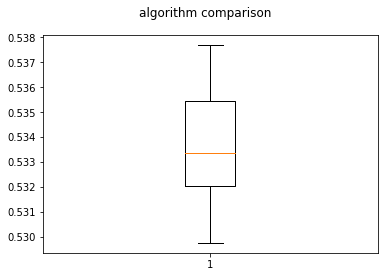

In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [148]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0789830	total: 98.1ms	remaining: 1m 38s
1:	learn: 1.0628175	total: 193ms	remaining: 1m 36s
2:	learn: 1.0493487	total: 289ms	remaining: 1m 35s
3:	learn: 1.0370809	total: 392ms	remaining: 1m 37s
4:	learn: 1.0270880	total: 487ms	remaining: 1m 37s
5:	learn: 1.0180939	total: 585ms	remaining: 1m 36s
6:	learn: 1.0108785	total: 686ms	remaining: 1m 37s
7:	learn: 1.0046274	total: 780ms	remaining: 1m 36s
8:	learn: 0.9988407	total: 881ms	remaining: 1m 37s
9:	learn: 0.9935438	total: 982ms	remaining: 1m 37s
10:	learn: 0.9888691	total: 1.07s	remaining: 1m 36s
11:	learn: 0.9849250	total: 1.17s	remaining: 1m 36s
12:	learn: 0.9811101	total: 1.27s	remaining: 1m 36s
13:	learn: 0.9775214	total: 1.36s	remaining: 1m 35s
14:	learn: 0.9744089	total: 1.46s	remaining: 1m 35s
15:	learn: 0.9717091	total: 1.55s	remaining: 1m 35s
16:	learn: 0.9691570	total: 1.64s	remaining: 1m 34s
17:	learn: 0.9667679	total: 1.74s	remaining: 1m 34s
18:	learn: 0.9647643	total: 1.84s	remaining

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe101.csv',index=False)

# feature selection

In [0]:
df11=df2.drop(columns=['Gender_Male'],axis=1)

In [0]:
df11['Gender']=df['Gender'].map({"Male":1,"Female":0})

In [159]:
train=df11[df11['train/test']==1]
test=df11[df11['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0137798	total: 612ms	remaining: 1m 26s
7:	learn: 1.0069456	total: 700ms	remaining: 1m 26s
8:	learn: 1.0014335	total: 803ms	remaining: 1m 28s
9:	learn: 0.9963708	total: 893ms	remaining: 1m 28s
10:	learn: 0.9922569	total: 980ms	remaining: 1m 28s
11:	learn: 0.9885014	total: 1.08s	remaining: 1m 28s
12:	learn: 0.9850088	total: 1.16s	remaining: 1m 28s
13:	learn: 0.9817569	total: 1.25s	remaining: 1m 27s
14:	learn: 0.9785694	total: 1.33s	remaining: 1m 27s
15:	learn: 0.9754946	total: 1.42s	remaining: 1m 27s
16:	learn: 0.9725195	total: 1.51s	remaining: 1m 27s
17:	learn: 0.9697398	total: 1.6s	remaining: 1m 27s
18:	learn: 0.9676257	total: 1.68s	remaining: 1m 26s
19:	learn: 0.9656490	total: 1.76s	remaining: 1m 26s
20:	learn: 0.9639461	total: 1.85s	remaining: 1m 26s
21:	learn: 0.9623072	total: 1.94s	remaining: 1m 26s
22:	learn: 0.9602602	total: 2.02s	remaining: 1m 26s
23:	learn: 0.9588128	total: 2.12s	remaining: 1m 26s
24:	learn: 0.95738

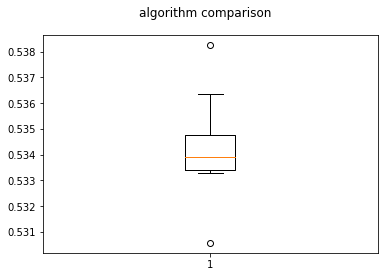

In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [161]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0792410	total: 94.7ms	remaining: 1m 34s
1:	learn: 1.0633591	total: 187ms	remaining: 1m 33s
2:	learn: 1.0503817	total: 281ms	remaining: 1m 33s
3:	learn: 1.0385922	total: 412ms	remaining: 1m 42s
4:	learn: 1.0292306	total: 514ms	remaining: 1m 42s
5:	learn: 1.0204274	total: 623ms	remaining: 1m 43s
6:	learn: 1.0130412	total: 721ms	remaining: 1m 42s
7:	learn: 1.0068206	total: 820ms	remaining: 1m 41s
8:	learn: 1.0013166	total: 921ms	remaining: 1m 41s
9:	learn: 0.9960765	total: 1.01s	remaining: 1m 40s
10:	learn: 0.9917988	total: 1.11s	remaining: 1m 39s
11:	learn: 0.9878989	total: 1.21s	remaining: 1m 39s
12:	learn: 0.9844121	total: 1.31s	remaining: 1m 39s
13:	learn: 0.9810511	total: 1.4s	remaining: 1m 38s
14:	learn: 0.9780813	total: 1.5s	remaining: 1m 38s
15:	learn: 0.9750428	total: 1.6s	remaining: 1m 38s
16:	learn: 0.9725709	total: 1.7s	remaining: 1m 38s
17:	learn: 0.9701831	total: 1.79s	remaining: 1m 37s
18:	learn: 0.9682473	total: 1.88s	remaining: 1m

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_base2fe11.csv',index=False)

#feature selection

In [163]:
cbc.feature_importances_

array([19.25127043,  3.06277651,  3.12067084, 10.21634909,  9.02679339,
       10.67857998,  9.7980056 , 11.02408979,  4.66843098,  9.54606522,
        2.02075528,  6.92968905,  0.65652384])

In [164]:
imp=pd.DataFrame(cbc.feature_importances_,index=x.columns,columns=['sign'])

sign_df=imp.sort_values(by="sign",ascending=False)
sign_df1=sign_df.reset_index()
sign_df1

index       sign
0                      Loan_Amount_Requested  19.251270
1                    Months_Since_Deliquency  11.024090
2                             Debt_To_Income  10.678580
3                              Annual_Income  10.216349
4                         Inquiries_Last_6Mo   9.798006
5                             Total_Accounts   9.546065
6                            Purpose_Of_Loan   9.026793
7               Income_Verified_not verified   6.929689
8                       Number_Open_Accounts   4.668431
9                                 Home_Owner   3.120671
10                           Length_Employed   3.062777
11  Income_Verified_VERIFIED - income source   2.020755
12                                    Gender   0.656524

In [166]:
sign_df_final=sign_df1[sign_df1['sign']>2.020756]
sign_df_final

index       sign
0          Loan_Amount_Requested  19.251270
1        Months_Since_Deliquency  11.024090
2                 Debt_To_Income  10.678580
3                  Annual_Income  10.216349
4             Inquiries_Last_6Mo   9.798006
5                 Total_Accounts   9.546065
6                Purpose_Of_Loan   9.026793
7   Income_Verified_not verified   6.929689
8           Number_Open_Accounts   4.668431
9                     Home_Owner   3.120671
10               Length_Employed   3.062777

In [167]:
list_cols=list(sign_df_final['index'])
list_cols.append('train/test')
list_cols.append('Interest_Rate')
print(len(list_cols))

13


In [168]:
df_fs=df2[list_cols]
print(df_fs.shape)

(273850, 13)


In [169]:
train=df_fs[df_fs['train/test']==1]
test=df_fs[df_fs['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 11)
y_train shape is  (164309,)
x_test shape is  (109541, 11)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0125696	total: 613ms	remaining: 1m 26s
7:	learn: 1.0065011	total: 695ms	remaining: 1m 26s
8:	learn: 1.0011054	total: 783ms	remaining: 1m 26s
9:	learn: 0.9962263	total: 878ms	remaining: 1m 26s
10:	learn: 0.9916382	total: 967ms	remaining: 1m 26s
11:	learn: 0.9874964	total: 1.06s	remaining: 1m 27s
12:	learn: 0.9838628	total: 1.15s	remaining: 1m 27s
13:	learn: 0.9805466	total: 1.24s	remaining: 1m 27s
14:	learn: 0.9777805	total: 1.33s	remaining: 1m 27s
15:	learn: 0.9751435	total: 1.42s	remaining: 1m 27s
16:	learn: 0.9727110	total: 1.5s	remaining: 1m 26s
17:	learn: 0.9701725	total: 1.58s	remaining: 1m 26s
18:	learn: 0.9679428	total: 1.67s	remaining: 1m 26s
19:	learn: 0.9658560	total: 1.75s	remaining: 1m 25s
20:	learn: 0.9640783	total: 1.84s	remaining: 1m 25s
21:	learn: 0.9624190	total: 1.93s	remaining: 1m 25s
22:	learn: 0.9610254	total: 2.01s	remaining: 1m 25s
23:	learn: 0.9590506	total: 2.1s	remaining: 1m 25s
24:	learn: 0.957680

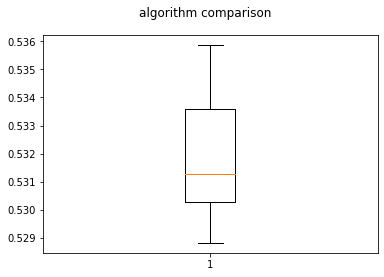

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [171]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0793227	total: 97.3ms	remaining: 1m 37s
1:	learn: 1.0632893	total: 198ms	remaining: 1m 39s
2:	learn: 1.0497320	total: 306ms	remaining: 1m 41s
3:	learn: 1.0381587	total: 428ms	remaining: 1m 46s
4:	learn: 1.0284842	total: 525ms	remaining: 1m 44s
5:	learn: 1.0198997	total: 622ms	remaining: 1m 43s
6:	learn: 1.0129113	total: 717ms	remaining: 1m 41s
7:	learn: 1.0067510	total: 831ms	remaining: 1m 43s
8:	learn: 1.0012352	total: 933ms	remaining: 1m 42s
9:	learn: 0.9963428	total: 1.03s	remaining: 1m 41s
10:	learn: 0.9919086	total: 1.13s	remaining: 1m 41s
11:	learn: 0.9880219	total: 1.23s	remaining: 1m 40s
12:	learn: 0.9842595	total: 1.33s	remaining: 1m 41s
13:	learn: 0.9807206	total: 1.43s	remaining: 1m 40s
14:	learn: 0.9779076	total: 1.53s	remaining: 1m 40s
15:	learn: 0.9753116	total: 1.63s	remaining: 1m 40s
16:	learn: 0.9725094	total: 1.72s	remaining: 1m 39s
17:	learn: 0.9702429	total: 1.82s	remaining: 1m 39s
18:	learn: 0.9681937	total: 1.92s	remaining

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/cbc_fs1.csv',index=False)

# Feature eng engineering : grouing of classes of "Inquiries_Last_6Mo"

In [178]:
dfc=df2.copy()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_Amount_Requested                     273850 non-null  float64
 1   Length_Employed                           273850 non-null  int64  
 2   Home_Owner                                273850 non-null  int64  
 3   Annual_Income                             273850 non-null  float64
 4   Purpose_Of_Loan                           273850 non-null  int64  
 5   Debt_To_Income                            273850 non-null  float64
 6   Inquiries_Last_6Mo                        273850 non-null  int64  
 7   Months_Since_Deliquency                   273850 non-null  float64
 8   Number_Open_Accounts                      273850 non-null  int64  
 9   Total_Accounts                            273850 non-null  int64  
 10  Interest_Rate       

In [181]:
dfc['Inquiries_Last_6Mo'].value_counts(normalize=True)*100

0    52.030674
1    28.041263
2    12.417747
3     5.415008
4     1.379953
5     0.497718
6     0.203031
7     0.010955
8     0.003652
Name: Inquiries_Last_6Mo, dtype: float64

In [0]:
def inq_grouping(x):
  if x in [4,5,6,7,8]:
    return(4)
  else:
    return x

In [0]:
dfc['Inquiries_Last_6Mo_group']=dfc['Inquiries_Last_6Mo'].apply(inq_grouping)

In [0]:
dfc1=dfc.drop(columns=['Inquiries_Last_6Mo'],axis=1)

In [188]:
train=dfc1[dfc1['train/test']==1]
test=dfc1[dfc1['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0140354	total: 608ms	remaining: 1m 26s
7:	learn: 1.0078839	total: 692ms	remaining: 1m 25s
8:	learn: 1.0022323	total: 783ms	remaining: 1m 26s
9:	learn: 0.9970135	total: 868ms	remaining: 1m 25s
10:	learn: 0.9927604	total: 954ms	remaining: 1m 25s
11:	learn: 0.9890405	total: 1.04s	remaining: 1m 25s
12:	learn: 0.9852660	total: 1.12s	remaining: 1m 25s
13:	learn: 0.9817827	total: 1.21s	remaining: 1m 25s
14:	learn: 0.9783229	total: 1.29s	remaining: 1m 25s
15:	learn: 0.9752553	total: 1.38s	remaining: 1m 24s
16:	learn: 0.9725603	total: 1.46s	remaining: 1m 24s
17:	learn: 0.9701774	total: 1.55s	remaining: 1m 24s
18:	learn: 0.9680406	total: 1.63s	remaining: 1m 24s
19:	learn: 0.9655918	total: 1.71s	remaining: 1m 23s
20:	learn: 0.9637630	total: 1.8s	remaining: 1m 23s
21:	learn: 0.9617762	total: 1.88s	remaining: 1m 23s
22:	learn: 0.9600754	total: 1.97s	remaining: 1m 23s
23:	learn: 0.9585791	total: 2.05s	remaining: 1m 23s
24:	learn: 0.95706

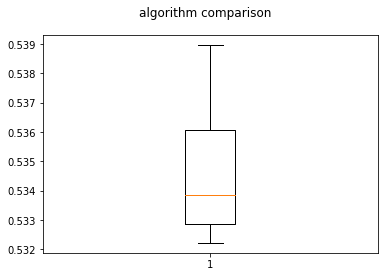

In [189]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [190]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0792601	total: 97.9ms	remaining: 1m 37s
1:	learn: 1.0630970	total: 195ms	remaining: 1m 37s
2:	learn: 1.0495504	total: 292ms	remaining: 1m 37s
3:	learn: 1.0387061	total: 387ms	remaining: 1m 36s
4:	learn: 1.0293262	total: 500ms	remaining: 1m 39s
5:	learn: 1.0207692	total: 599ms	remaining: 1m 39s
6:	learn: 1.0139355	total: 689ms	remaining: 1m 37s
7:	learn: 1.0077511	total: 786ms	remaining: 1m 37s
8:	learn: 1.0022743	total: 884ms	remaining: 1m 37s
9:	learn: 0.9969550	total: 978ms	remaining: 1m 36s
10:	learn: 0.9926882	total: 1.07s	remaining: 1m 36s
11:	learn: 0.9887534	total: 1.17s	remaining: 1m 36s
12:	learn: 0.9848938	total: 1.26s	remaining: 1m 35s
13:	learn: 0.9813693	total: 1.35s	remaining: 1m 35s
14:	learn: 0.9783163	total: 1.46s	remaining: 1m 36s
15:	learn: 0.9754616	total: 1.56s	remaining: 1m 35s
16:	learn: 0.9732206	total: 1.65s	remaining: 1m 35s
17:	learn: 0.9702682	total: 1.74s	remaining: 1m 35s
18:	learn: 0.9680416	total: 1.85s	remaining

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/fe_grp.csv',index=False)

# feature engineering: "annual income" * "debt_income ratio"

In [0]:
df14=df2.copy()

In [0]:
df14['income_to_debtratio']=df14['Annual_Income']*df14['Debt_To_Income']

In [194]:
train=df14[df14['train/test']==1]
test=df14[df14['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 14)
y_train shape is  (164309,)
x_test shape is  (109541, 14)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0137293	total: 627ms	remaining: 1m 28s
7:	learn: 1.0069365	total: 711ms	remaining: 1m 28s
8:	learn: 1.0015173	total: 800ms	remaining: 1m 28s
9:	learn: 0.9965270	total: 889ms	remaining: 1m 27s
10:	learn: 0.9920519	total: 975ms	remaining: 1m 27s
11:	learn: 0.9881811	total: 1.06s	remaining: 1m 27s
12:	learn: 0.9844122	total: 1.15s	remaining: 1m 27s
13:	learn: 0.9808941	total: 1.23s	remaining: 1m 26s
14:	learn: 0.9778883	total: 1.33s	remaining: 1m 27s
15:	learn: 0.9746810	total: 1.43s	remaining: 1m 27s
16:	learn: 0.9720477	total: 1.51s	remaining: 1m 27s
17:	learn: 0.9698397	total: 1.6s	remaining: 1m 27s
18:	learn: 0.9675898	total: 1.69s	remaining: 1m 27s
19:	learn: 0.9658245	total: 1.77s	remaining: 1m 26s
20:	learn: 0.9640175	total: 1.86s	remaining: 1m 26s
21:	learn: 0.9620275	total: 1.95s	remaining: 1m 26s
22:	learn: 0.9605145	total: 2.04s	remaining: 1m 26s
23:	learn: 0.9590782	total: 2.14s	remaining: 1m 26s
24:	learn: 0.95784

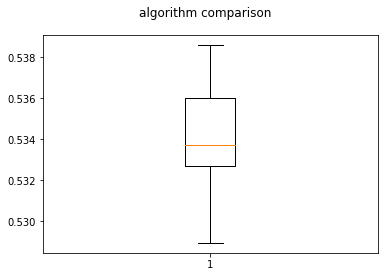

In [195]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [196]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0801018	total: 98.1ms	remaining: 1m 37s
1:	learn: 1.0640370	total: 196ms	remaining: 1m 37s
2:	learn: 1.0501847	total: 290ms	remaining: 1m 36s
3:	learn: 1.0390605	total: 389ms	remaining: 1m 36s
4:	learn: 1.0290242	total: 496ms	remaining: 1m 38s
5:	learn: 1.0210215	total: 597ms	remaining: 1m 38s
6:	learn: 1.0139660	total: 696ms	remaining: 1m 38s
7:	learn: 1.0071353	total: 807ms	remaining: 1m 40s
8:	learn: 1.0013187	total: 902ms	remaining: 1m 39s
9:	learn: 0.9968765	total: 997ms	remaining: 1m 38s
10:	learn: 0.9919051	total: 1.09s	remaining: 1m 38s
11:	learn: 0.9878575	total: 1.19s	remaining: 1m 37s
12:	learn: 0.9841547	total: 1.28s	remaining: 1m 37s
13:	learn: 0.9807108	total: 1.38s	remaining: 1m 37s
14:	learn: 0.9776455	total: 1.48s	remaining: 1m 37s
15:	learn: 0.9747488	total: 1.57s	remaining: 1m 36s
16:	learn: 0.9720682	total: 1.68s	remaining: 1m 36s
17:	learn: 0.9697903	total: 1.77s	remaining: 1m 36s
18:	learn: 0.9678202	total: 1.87s	remaining

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/df14_fe.csv',index=False)

# grouping "purpose of loan"

In [0]:
df15=df2.copy()

In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 15 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Loan_Amount_Requested                     273850 non-null  float64
 1   Length_Employed                           273850 non-null  int64  
 2   Home_Owner                                273850 non-null  int64  
 3   Annual_Income                             273850 non-null  float64
 4   Purpose_Of_Loan                           273850 non-null  int64  
 5   Debt_To_Income                            273850 non-null  float64
 6   Inquiries_Last_6Mo                        273850 non-null  int64  
 7   Months_Since_Deliquency                   273850 non-null  float64
 8   Number_Open_Accounts                      273850 non-null  int64  
 9   Total_Accounts                            273850 non-null  int64  
 10  Interest_Rate       

In [199]:
df2['Debt_To_Income'].min()

0.0

In [203]:
df['Purpose_Of_Loan'].value_counts(normalize=True)*100

debt_consolidation    58.938470
credit_card           22.418842
home_improvement       5.643601
other                  5.056053
major_purchase         2.085813
small_business         1.484024
car                    1.149900
medical                0.961475
moving                 0.611649
vacation               0.530582
wedding                0.491145
house                  0.480555
renewable_energy       0.075224
educational            0.072668
Name: Purpose_Of_Loan, dtype: float64

In [0]:
def grp(x):
  if x == "debt_consolidation":
    return 6
  elif x=="credit_card":
    return 5
  elif x in ["home_improvement","other"]:
    return 4
  elif x =="major_purchase":
    return 3
  elif x in ["small_business","car"]:
    return 2
  else:
    return 1

In [0]:
df15['purpose_of_loan_grp']=df['Purpose_Of_Loan'].apply(grp)

In [0]:
df15=df15.drop(columns=['Purpose_Of_Loan'],axis=1)

In [214]:
train=df15[df15['train/test']==1]
test=df15[df15['train/test']==0]
y=train['Interest_Rate']
x=train.drop(columns=['Interest_Rate',"train/test"])
x_test=test.drop(columns=["train/test",'Interest_Rate'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (164309, 13)
y_train shape is  (164309,)
x_test shape is  (109541, 13)


Streaming output truncated to the last 5000 lines.
6:	learn: 1.0183549	total: 626ms	remaining: 1m 28s
7:	learn: 1.0116253	total: 708ms	remaining: 1m 27s
8:	learn: 1.0061879	total: 802ms	remaining: 1m 28s
9:	learn: 1.0006448	total: 887ms	remaining: 1m 27s
10:	learn: 0.9962115	total: 985ms	remaining: 1m 28s
11:	learn: 0.9925202	total: 1.07s	remaining: 1m 28s
12:	learn: 0.9887726	total: 1.16s	remaining: 1m 27s
13:	learn: 0.9854596	total: 1.24s	remaining: 1m 27s
14:	learn: 0.9820121	total: 1.33s	remaining: 1m 27s
15:	learn: 0.9788534	total: 1.41s	remaining: 1m 26s
16:	learn: 0.9760702	total: 1.5s	remaining: 1m 26s
17:	learn: 0.9735436	total: 1.58s	remaining: 1m 26s
18:	learn: 0.9717204	total: 1.67s	remaining: 1m 26s
19:	learn: 0.9696780	total: 1.76s	remaining: 1m 26s
20:	learn: 0.9676923	total: 1.84s	remaining: 1m 25s
21:	learn: 0.9660874	total: 1.92s	remaining: 1m 25s
22:	learn: 0.9645546	total: 2.01s	remaining: 1m 25s
23:	learn: 0.9628831	total: 2.1s	remaining: 1m 25s
24:	learn: 0.961301

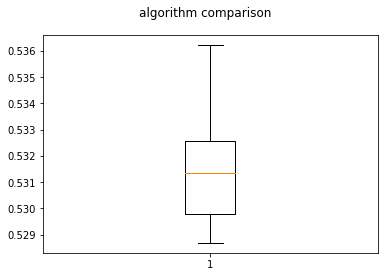

In [215]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier


results=[]
names=[]
models1=[]

cbc=CatBoostClassifier()

models1.append(('cbc',cbc))


for name,model in models1:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [216]:
for name,algo in models1:
    print(algo)
    model=algo.fit(x,y)

Learning rate set to 0.102641
0:	learn: 1.0799730	total: 99.6ms	remaining: 1m 39s
1:	learn: 1.0648232	total: 198ms	remaining: 1m 38s
2:	learn: 1.0514290	total: 290ms	remaining: 1m 36s
3:	learn: 1.0409783	total: 386ms	remaining: 1m 36s
4:	learn: 1.0315226	total: 488ms	remaining: 1m 37s
5:	learn: 1.0236707	total: 595ms	remaining: 1m 38s
6:	learn: 1.0165706	total: 695ms	remaining: 1m 38s
7:	learn: 1.0108719	total: 791ms	remaining: 1m 38s
8:	learn: 1.0053035	total: 916ms	remaining: 1m 40s
9:	learn: 0.9998785	total: 1.02s	remaining: 1m 40s
10:	learn: 0.9951561	total: 1.11s	remaining: 1m 40s
11:	learn: 0.9916756	total: 1.21s	remaining: 1m 39s
12:	learn: 0.9881458	total: 1.3s	remaining: 1m 39s
13:	learn: 0.9850309	total: 1.4s	remaining: 1m 38s
14:	learn: 0.9816398	total: 1.5s	remaining: 1m 38s
15:	learn: 0.9785875	total: 1.59s	remaining: 1m 37s
16:	learn: 0.9764591	total: 1.68s	remaining: 1m 37s
17:	learn: 0.9741817	total: 1.78s	remaining: 1m 37s
18:	learn: 0.9721639	total: 1.88s	remaining: 1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_For _Banking/test_fjtUOL8.csv")
y_pred=cbc.predict(x_test)
r1=id['Loan_ID']
r2=pd.DataFrame(y_pred,columns=['Interest_Rate'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/ML_For _Banking/Results/df15_fe1.csv',index=False)